# Machine Vision Lab 2
> Name - Ojas Patil
>
> Register Number - 21BAI1106

### Task 1: Image Negative Transformation - To Create image negative using Python

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
def image_negative(image):
    img_array = np.array(image)
    negative = 255 - img_array
    return Image.fromarray(negative)

In [5]:
def display_images(original, negative):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(negative, cmap='gray')
    ax2.set_title('Negative Image')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

Step 1 - Load grayscale image

In [6]:
image_path = '/content/kane-house-dragon-ball-4k-cr-1920x1080.jpg'
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

Step 2 - Applying image negative transformation

In [7]:
negative_image = image_negative(grayscale_image)

Step 3 - Displaying original and negative image

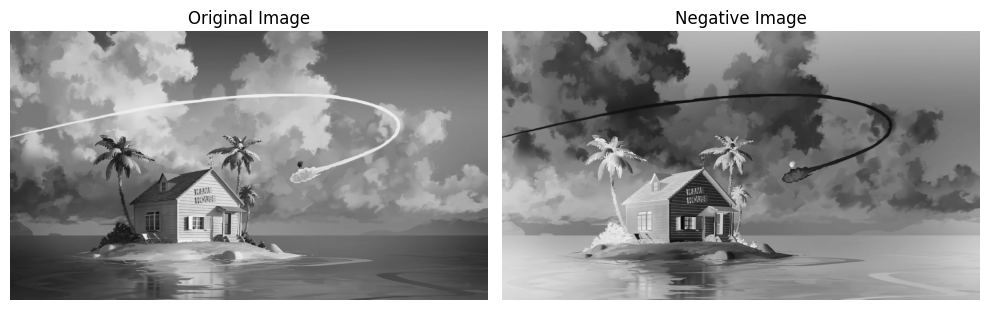

In [8]:
display_images(grayscale_image, negative_image)

### Task 2: Gamma Correction - Apply gamma correction with different gamma values

In [9]:
def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

Step 1 - Load grayscale image

In [10]:
image_path = '/content/kane-house-dragon-ball-4k-cr-1920x1080.jpg'
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

Step 2 - Applying image negative transformation

In [11]:
gamma_corrected_0_5 = gamma_correction(grayscale_image, 0.5)
gamma_corrected_1_0 = gamma_correction(grayscale_image, 1.0)
gamma_corrected_2_0 = gamma_correction(grayscale_image, 2.0)

Step 3 - Displaying original and negative image

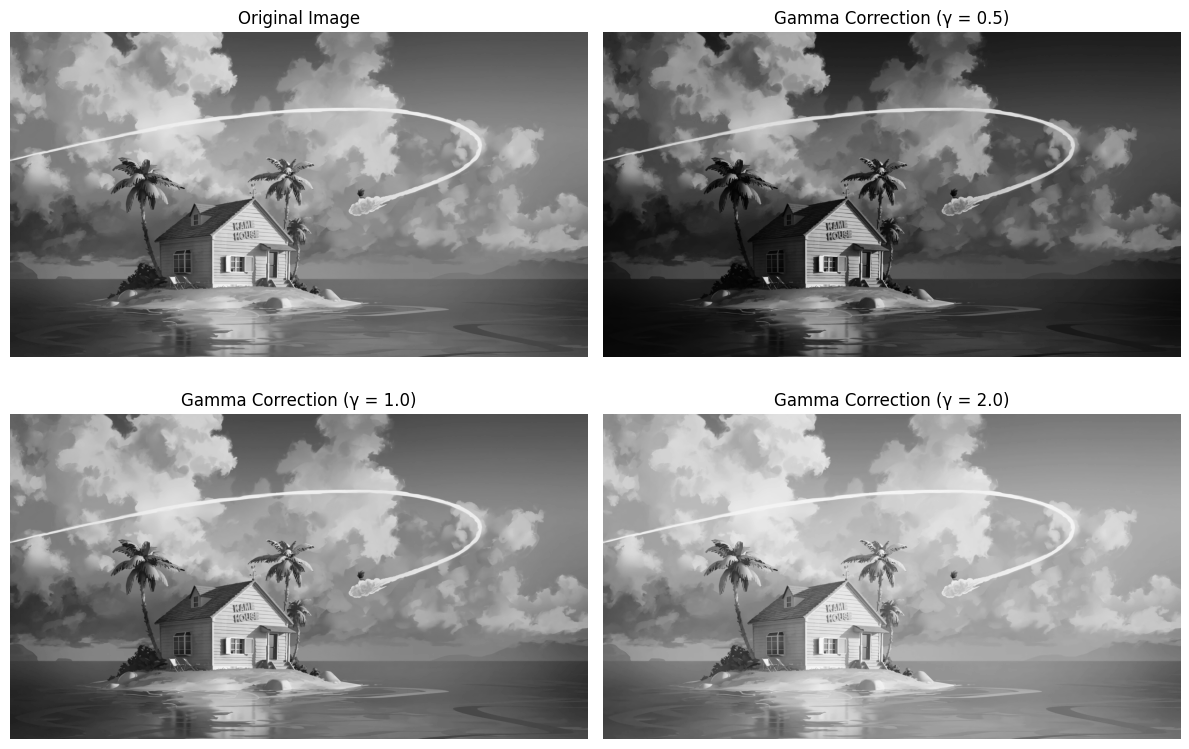

In [12]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')

# Gamma = 0.5
plt.subplot(2, 2, 2)
plt.title('Gamma Correction (γ = 0.5)')
plt.imshow(gamma_corrected_0_5, cmap='gray')
plt.axis('off')

# Gamma = 1.0
plt.subplot(2, 2, 3)
plt.title('Gamma Correction (γ = 1.0)')
plt.imshow(gamma_corrected_1_0, cmap='gray')
plt.axis('off')

# Gamma = 2.0
plt.subplot(2, 2, 4)
plt.title('Gamma Correction (γ = 2.0)')
plt.imshow(gamma_corrected_2_0, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

### Task 3: Log Transform - Apply log transformations to enhance an image

In [13]:
def log_transform(image):
    c = 255 / (np.log(1 + np.max(image)))
    log_image = c * (np.log(1 + image))

    log_image = np.array(log_image, dtype=np.uint8)
    return log_image

In [14]:
image_path = '/content/kane-house-dragon-ball-4k-cr-1920x1080.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [15]:
log_transformed_image = log_transform(image)

<ipython-input-13-766591d7260b>:3: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(1 + image))
<ipython-input-13-766591d7260b>:5: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype=np.uint8)


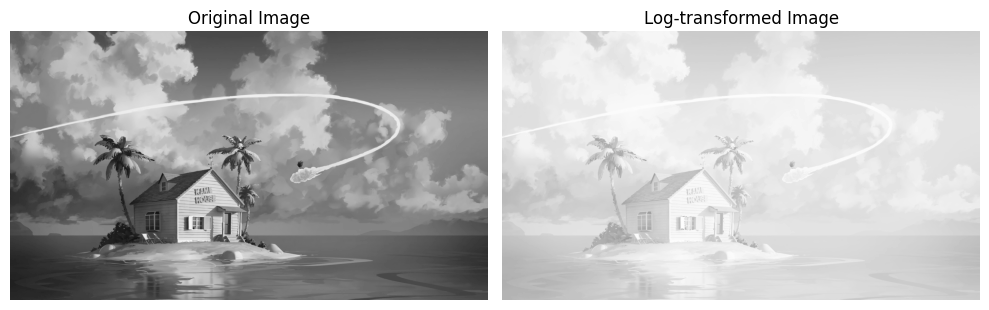

In [16]:
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Log-transformed Image
plt.subplot(1, 2, 2)
plt.title('Log-transformed Image')
plt.imshow(log_transformed_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

### Task 4: Compare Transformations - Compare the effects of different transformations

In [17]:
image_path = '/content/kane-house-dragon-ball-4k-cr-1920x1080.jpg'
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

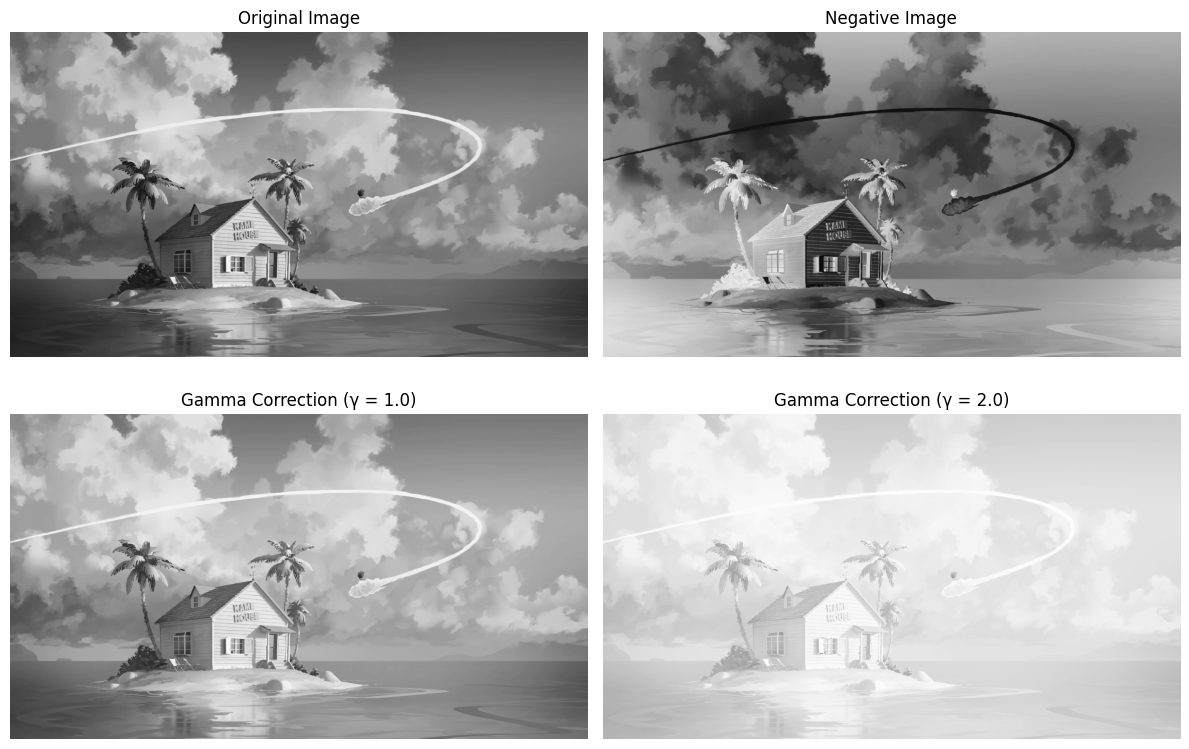

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')

# Gamma = 0.5
plt.subplot(2, 2, 2)
plt.title('Negative Image')
plt.imshow(negative_image, cmap='gray')
plt.axis('off')

# Gamma = 1.0
plt.subplot(2, 2, 3)
plt.title('Gamma Correction (γ = 1.0)')
plt.imshow(gamma_corrected_2_0, cmap='gray')
plt.axis('off')

# Gamma = 2.0
plt.subplot(2, 2, 4)
plt.title('Gamma Correction (γ = 2.0)')
plt.imshow(log_transformed_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

### Task 5: Apply Transformations to Color Images - Apply the transformations to a color image by processing each channel separately

In [28]:
image = cv2.imread('/content/kane-house-dragon-ball-4k-cr-1920x1080.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [29]:
R, G, B = cv2.split(image_rgb)

In [32]:
def negative_transform(image):
    return 255 - image

In [33]:
R_neg = negative_transform(R)
G_neg = negative_transform(G)
B_neg = negative_transform(B)
negative_image = cv2.merge([R_neg, G_neg, B_neg])

In [34]:
R_gamma = gamma_correction(R, 2.0)
G_gamma = gamma_correction(G, 2.0)
B_gamma = gamma_correction(B, 2.0)
gamma_corrected_image = cv2.merge([R_gamma, G_gamma, B_gamma])

In [35]:
R_log = log_transform(R)
G_log = log_transform(G)
B_log = log_transform(B)
log_transformed_image = cv2.merge([R_log, G_log, B_log])

<ipython-input-13-766591d7260b>:3: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(1 + image))
<ipython-input-13-766591d7260b>:5: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype=np.uint8)


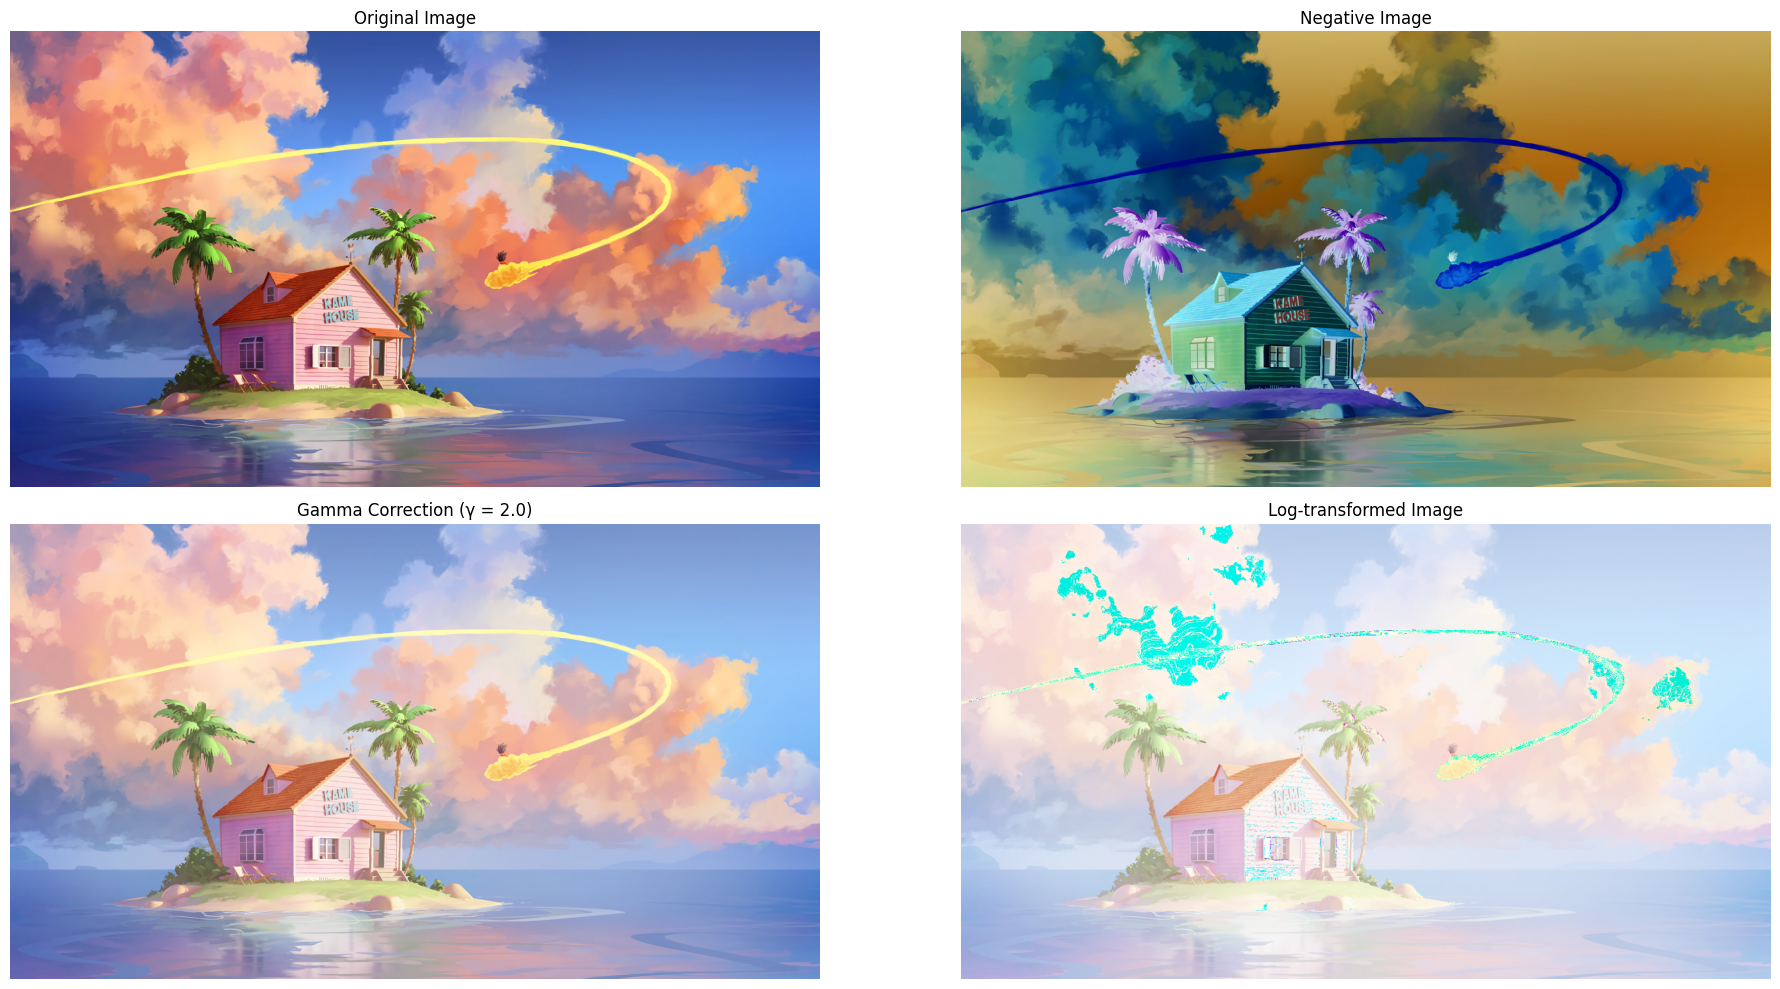

In [36]:
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

# Negative Image
plt.subplot(2, 2, 2)
plt.title('Negative Image')
plt.imshow(negative_image)
plt.axis('off')

# Gamma Corrected Image (γ = 2.0)
plt.subplot(2, 2, 3)
plt.title('Gamma Correction (γ = 2.0)')
plt.imshow(gamma_corrected_image)
plt.axis('off')

# Log-transformed Image
plt.subplot(2, 2, 4)
plt.title('Log-transformed Image')
plt.imshow(log_transformed_image)
plt.axis('off')

plt.tight_layout()
plt.show()